In [71]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [72]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [73]:
df = pd.read_csv(dataset)
df['1'].value_counts()

1    1570
2    1356
3     337
4     209
Name: 1, dtype: int64

# Set number of classes

In [74]:
NUM_CLASSES = 5

# Dataset reading

In [75]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [76]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(21 * 2*2, activation='relu'),
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [87]:
# model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

In [88]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [89]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [90]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
21/21 [==============================] - ETA: 0s - loss: 1.6151 - accuracy: 0.2976
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 1s 23ms/step - loss: 1.6151 - accuracy: 0.2976 - val_loss: 1.3015 - val_accuracy: 0.5236
Epoch 2/1000
15/21 [====================>.........] - ETA: 0s - loss: 1.4000 - accuracy: 0.4099
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 11ms/step - loss: 1.3838 - accuracy: 0.4155 - val_loss: 1.1439 - val_accuracy: 0.5811
Epoch 3/1000
15/21 [====================>.........] - ETA: 0s - loss: 1.3051 - accuracy: 0.4526
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 10ms/step - loss: 1.3075 - accuracy: 0.4485 - val_loss: 1.0117 - val_accuracy: 0.6226
Epoch 4/1000
20/21 [===========================>..] - ETA: 0s - loss: 1.2028 - accuracy: 0.491

In [66]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 [==============================] - 0s 11ms/step - loss: 0.5725 - accuracy: 0.6295


In [56]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [57]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 48ms/step
[4.4600968e-04 4.5366526e-01 1.0284088e-01 4.4304788e-01]
1


# Confusion matrix

28/28 [==============================] - 0s 2ms/step


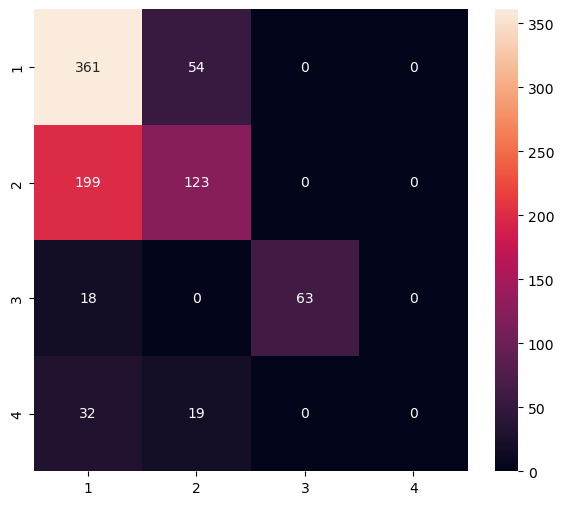

Classification Report
              precision    recall  f1-score   support

           1       0.59      0.87      0.70       415
           2       0.63      0.38      0.47       322
           3       1.00      0.78      0.88        81
           4       0.00      0.00      0.00        51

    accuracy                           0.63       869
   macro avg       0.55      0.51      0.51       869
weighted avg       0.61      0.63      0.59       869



/Users/ke7in/opt/anaconda3/envs/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ke7in/opt/anaconda3/envs/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ke7in/opt/anaconda3/envs/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [59]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [60]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/m8/72xjfd3j68x6b8sthv31j8_m0000gn/T/tmp267eqn37/assets


INFO:tensorflow:Assets written to: /var/folders/m8/72xjfd3j68x6b8sthv31j8_m0000gn/T/tmp267eqn37/assets
2023-06-26 00:59:35.599396: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-26 00:59:35.599412: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


6572

# Inference test

In [61]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [62]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [63]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [64]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 159 µs, sys: 43 µs, total: 202 µs
Wall time: 220 µs


In [65]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.4805106e-16 1.0000000e+00 6.9678035e-14 1.1494438e-08]
1
